In [1]:
import sys
sys.path.append('/Users/welcome/Google Drive (cuong.tranus@gmail.com)/research/lagrangian-dual-deep-learning/fairness/')
from utils import * 
from model import *


In [2]:
%cd /Users/welcome/Google Drive (cuong.tranus@gmail.com)/research/lagrangian-dual-deep-learning/fairness/


/Users/welcome/Google Drive (cuong.tranus@gmail.com)/research/lagrangian-dual-deep-learning/fairness


In [13]:
import matplotlib.pyplot as plt

def plot_acc_fairness(model):
    f, axes = plt.subplots(figsize=(16, 6), nrows=1, ncols=2, sharex=True, sharey=False)
    curr_ax = axes[0]
    curr_ax.plot( [x[0] for x in model.logs])
    curr_ax.set_ylabel('Model Accuracy', fontsize = 20)
    curr_ax.set_xlabel('Epochs', fontsize = 20)
    curr_ax.tick_params(axis="x", labelsize=15)
    curr_ax.tick_params(axis="y", labelsize=15)
    
    curr_ax = axes[1]
    curr_ax.plot( [x[1] for x in model.logs])
    curr_ax.set_ylabel('DI-score',  fontsize = 20)
    curr_ax.set_xlabel('Epochs', fontsize = 20)
    curr_ax.tick_params(axis="x", labelsize=15)
    curr_ax.tick_params(axis="y", labelsize=15)
    
    plt.show()
    
    

In [3]:
from utils import * 
from model import *
pd00, label_name, z_name, feats = load_data('bank')
seed = 0
X_train, X_val, X_test, y_train, y_val, y_test, Z_train, Z_val, Z_test = get_data_loader(pd00, feats,
                                                                                         label_name, z_name,
                                                                                         seed=seed)
params = {}
params['X_train'] = X_train
params['X_val'] = X_val
params['y_train'] = y_train
params['y_val'] = y_val
params['Z_train'] = Z_train
params['Z_val'] = Z_val
params['device'] = 'cpu'
params['bs'] = 256
options = {}
options['model_lr'] = 1e-3

options['epochs'] = 400
input_dim = X_train.shape[1]
options['input_size'] = input_dim




In [4]:
## GRID SEARCH TO SELECT OPTIMAL NETWORK STRUCTURE
grid_search_list = []
options['acc_only'] = True #  Accuracy as the Metric to select Optimal Network  
options['step_size'] = 0.0 # Disable step-size if you only need to learn a simple classifier (w.o fairness)
options['lr_mult'] = 0  # also need to set the initial Multipliers to be zeroes

for n_gen in [int(x) for x in np.linspace(input_dim / 2, input_dim - 1, 2)]:
    for n_z in [int(x) for x in np.linspace(input_dim / 5 + 1, input_dim / 2, 2)]:
        if n_z < n_gen:
            curr_options = copy.deepcopy(options)
            curr_options['model_params'] = {'input_size': input_dim, 'gen_nnodes_list': [n_gen],
                                            'z1_nnodes_list': [n_z], \
                                            'z0_nnodes_list': [n_z]}
            grid_search_list.append(curr_options)

### 1. A simple Deep Network Classifier

In [5]:
# A simple deep network classifier without fairness
mc_model = LDSharedModel(params)
mc_model.hyper_opt(grid_search_list)


{'model_lr': 0.001, 'epochs': 400, 'input_size': 15, 'acc_only': True, 'step_size': 0.0, 'lr_mult': 0, 'model_params': {'input_size': 15, 'gen_nnodes_list': [7], 'z1_nnodes_list': [4], 'z0_nnodes_list': [4]}}
{'model_lr': 0.001, 'epochs': 400, 'input_size': 15, 'acc_only': True, 'step_size': 0.0, 'lr_mult': 0, 'model_params': {'input_size': 15, 'gen_nnodes_list': [14], 'z1_nnodes_list': [4], 'z0_nnodes_list': [4]}}
{'model_lr': 0.001, 'epochs': 400, 'input_size': 15, 'acc_only': True, 'step_size': 0.0, 'lr_mult': 0, 'model_params': {'input_size': 15, 'gen_nnodes_list': [14], 'z1_nnodes_list': [7], 'z0_nnodes_list': [7]}}


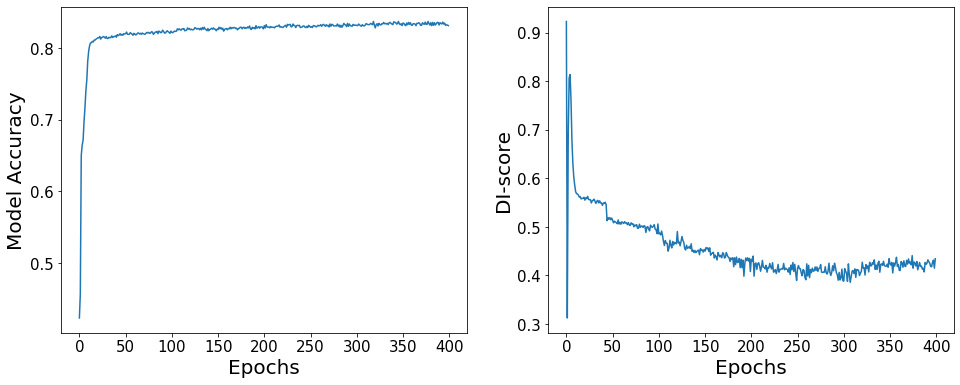

In [14]:
plot_acc_fairness(mc_model)

In [15]:
best_options = mc_model.best_options
print(best_options)

{'model_lr': 0.001, 'epochs': 400, 'input_size': 15, 'acc_only': True, 'step_size': 0.0, 'lr_mult': 0, 'model_params': {'input_size': 15, 'gen_nnodes_list': [14], 'z1_nnodes_list': [4], 'z0_nnodes_list': [4]}, 'return_output': True}


### 2. Fairness with Dual Lagrangian

In [ ]:
# Now we will show that our proposed Dual Lagrangian can reduce the model's bias, hence increase the fairness
# Here the measure of fairness is the DI-Score
mcd_model = LDSharedModel(params)
best_options['lr_mult'] = 0.0
best_options['step_size'] = 1e-3 *7
mcd_model.fit(best_options);


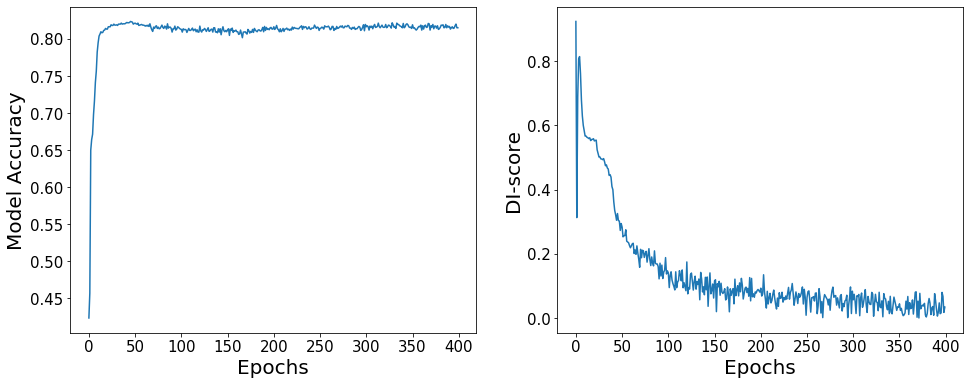

In [17]:
plot_acc_fairness(mcd_model)